In [1]:
import numpy as np
import random as r
import pandas as pd
from matplotlib import pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
%matplotlib inline

### Mi LinearRegression

In [2]:
def step(x, y, w0, w, lam, eta):
    err = y - w0 - np.dot(x,w)
    #print y, sum(w*x), err
    #print eta, err, x, eta*err*x
    w0 = w0 + eta*err
    w = w + eta*(err*x - lam*w)
    return w0, w

def sgd(x, y, w0, w, lam=1.0, eta=0.1, maxiter=100, tol=1e-5):
    k = 0
    iter = 0
    errs = []
    costs = []
    while iter < maxiter:
        w0, w = step(x[k,:], y[k], w0, w, lam, eta)
        err = sum((y - w0 - np.dot(x, w))**2)
        errs.append(err)
        costs.append(err + lam*sum(w*w))
        #print err, err + lam*sum(w*w), w0, w
        if k >= x.shape[0] - 1:
            k = 0
        else:
            k = k + 1
        iter = iter + 1
    return w0, w, errs, costs

### regLinPoli

In [3]:
df = pd.read_csv('datos/regLinPoli.csv')
#df['A'] = np.arange(df.shape[0])
#df['B'] = np.arange(df.shape[0])
#df['C'] = [r.random() for i in np.arange(df.shape[0])]

train_vars = [i for i in df.columns if i != 'y']
X_train, X_test, y_train, y_test = train_test_split(df[train_vars], df['y'])
scale_X = StandardScaler()
scale_y = StandardScaler()
scale_X.fit(X_train)
scale_y.fit(y_train)
x = scale_X.transform(X_train)
y = scale_y.transform(y_train)
x[1:5,:]

array([[ 1.70794901,  2.14595651,  0.05220021,  0.12434619],
       [-0.93353918, -0.91583768,  0.04441926,  0.5968389 ],
       [-0.48878162, -0.67354821,  0.04877412,  0.34886212],
       [ 1.43300493,  1.64529497,  0.22504143,  1.3961281 ]])

### Comparando lambdas

0.000223860878173 [ 0.40869744  0.4377081   0.01013541 -0.00069383]
0.000218291182573 [ 0.40629473  0.43505344  0.01010287 -0.00069143]
0.000207594650775 [ 0.40167878  0.42995508  0.01003986 -0.00068676]
0.000187321561676 [ 0.39292446  0.42029176  0.00991848 -0.00067766]
0.000149858394936 [ 0.3767267   0.40243327  0.00968715 -0.00065995]
8.38585408e-05 [ 0.34812218  0.3709674   0.00925545 -0.00062595]
-2.26862910394e-05 [ 0.30174034  0.32016298  0.00848232 -0.00056337]
-0.000170740267202 [ 0.23679466  0.24956783  0.00720503 -0.00046143]
-0.000335017674754 [ 0.16394886  0.17135515  0.00538916 -0.0003373 ]
-0.000475753705202 [ 0.1011078   0.10490872  0.00336334 -0.00025958]


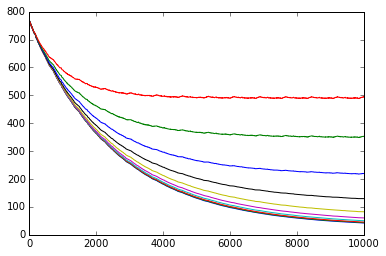

In [4]:
w0 = 0.0
w = 0*np.ones((x.shape[1],))#np.array([1*r.random() for i in range(x.shape[1])])
#w01, w1, errs1 = sgd(x, y, w0, w, lam=0.01, eta=0.0001, maxiter=1000) # Con eta chica converge más lento
#w02, w2, errs2 = sgd(x, y, w0, w, lam=0.0, eta=0.001, maxiter=1000)
#w03, w3, errs2 = sgd(x, y, w0, w, lam=1.0, eta=0.001, maxiter=4000)

#plt.plot(errs1)
#plt.plot(errs2)
lambdas = np.exp(np.linspace(-4,2,10))
res = [sgd(x, y, w0, w, lam=lam, eta=0.0001, maxiter=10000) for lam in lambdas]
#w0, w, errs, costs = res[0]
#plt.plot(errs, costs)
for w0, w, errs, costs in res:
    print w0, w
    plt.plot(errs)
    #plt.plot(costs)

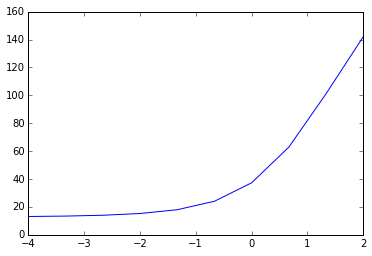

In [7]:
x_te = scale_X.transform(X_test)
y_te = scale_y.transform(y_test)
e = []
for ws0, ws, errs, costs in res:
    e.append(sum((y_te - ws0 - np.dot(x_te, ws))**2))
    #print sum((y_te - ws0 - np.dot(x_te, ws))**2)
    
plt.plot(np.log(lambdas), e) ### NO CONVIENE REGULARIZAR EN ESTE CASO
#print e

In [6]:
from sklearn import linear_model
clf = linear_model.Ridge(alpha = 0)
clf.fit(x, y) 
linear_model.Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, solver='auto', tol=0.001)
print clf.intercept_, clf.coef_

1.37261130707e-15 [ 0.04619804  0.94427244 -0.00270803 -0.00720363]
